In [14]:
import pandas as pd
import numpy as np

In [15]:
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [16]:
train = pd.read_csv('titanic_train.csv')

In [17]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

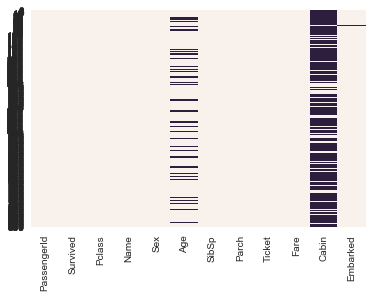

In [30]:
sns.heatmap(train.isnull(), cbar=False)

In [11]:
train.drop('Name',inplace=True,axis=1)

ValueError: labels ['Name'] not contained in axis

In [9]:
train.drop('Ticket',inplace=True,axis=1)

In [12]:
train.drop('PassengerId',inplace=True,axis=1)

In [31]:
train.drop('Cabin',inplace=True,axis=1)